### **In this part we performs basic Exploratory Data Analysis (EDA) on the chosen dataset. It includes data loading, cleaning, visualization, and summary statistics to understand the underlying patterns and relationships within the data.**
---

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

PATH_TO_DATA = "../csv_exports/"

Initialize dataframe on main dataset. Using flag `low_memory = False` not to limit memory usage.


Lets add item dataset as df_items.

In [112]:
df_items = pd.read_csv(PATH_TO_DATA + "item_full_export.csv", low_memory=False)
df_items

,market_hash_name,classid,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,price,id,real_instance,old_price,base_id,phase,paintindex,type,avg_price
0,Sticker | fnx | Cologne 2016,1835681296,188530139,0,2024-10-24 23:42:49,NaN,NaN,NaN,0.0,52116.0,88473924,188530139,0.0,0,NaN,NaN,Sticker,4.25
1,Sticker | Keoz (Gold) | Copenhagen 2024,6142409366,188530139,39392224748,2024-10-24 23:36:49,NaN,NaN,NaN,75.0,5610.0,5705064202,188530139,0.0,102737,NaN,NaN,Sticker,3.38
2,Sticker | Keoz (Gold) | Copenhagen 2024,6142409366,188530139,39392224741,2024-10-24 23:36:49,NaN,NaN,NaN,75.0,5610.0,5705064690,188530139,0.0,102737,NaN,NaN,Sticker,3.38
3,Sticker | Keoz (Gold) | Copenhagen 2024,6142409366,188530139,39392224735,2024-10-24 23:36:49,NaN,NaN,NaN,75.0,5610.0,5705064746,188530139,0.0,102737,NaN,NaN,Sticker,3.38
4,Sealed Graffiti | Smarmy (War Pig Pink),3608084332,519977179,18045451491,2024-10-24 23:02:29,0.0,NaN,NaN,50.0,720.0,670444127,519977179,0.0,81278,NaN,0.0,Graffiti,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701615,AWP | Neo-Noir (Minimal Wear),6221039356,5840723944,40003498872,2024-10-25 00:20:02,NaN,NaN,32006078374|31887059003|32006078374,95.0,27981.0,5843604927,5840723944,0.0,76546,NaN,NaN,Sniper Rifle,33.50
701616,Dual Berettas | Royal Consorts (Well-Worn),6222015788,480085569,40030174124,2024-10-25 00:20:03,NaN,NaN,NaN,100.0,430.0,5843604935,480085569,0.0,2835,NaN,NaN,Pistol,0.41
701617,Desert Eagle | Code Red (Battle-Scarred),6221039350,188530139,40004199066,2024-10-25 00:20:03,NaN,NaN,9074754424,95.0,16589.0,5843604943,188530139,0.0,4506,NaN,NaN,Pistol,17.68
701618,Chroma 2 Case,926978479,0,39910167364,2024-10-25 00:20:03,NaN,NaN,NaN,75.0,2771.0,5843604951,0,0.0,920,NaN,NaN,Container,3.03


The initial dimensionality of the created dataframe is 701620 rows x 18 columns.



As we saw in the previous output, some of the items dont have avg_price or float and marked as NA or zeros. We dont need such data so lets drop the useless pieces of information.

In [113]:
df_items.dropna(subset=["float", "avg_price"], inplace = True)
df_items = df_items[(df_items["float"] != 0) & (df_items["avg_price"] != 0)]
df_items

,market_hash_name,classid,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,price,id,real_instance,old_price,base_id,phase,paintindex,type,avg_price
6,StatTrak™ P250 | Muertos (Minimal Wear),3245227603,902658099,16210381346,2024-10-24 23:42:49,0.113143,NaN,1909039045|1909039045|1909039045,70.0,19679.0,1013402736,902658099,177700.0,741,NaN,NaN,Pistol,17.35
11,Nova | Windblown (Battle-Scarred),4428769401,188530139,25049162004,2024-10-25 00:03:19,0.480939,NaN,NaN,90.0,511.0,2660532544,188530139,0.0,84521,NaN,NaN,Shotgun,0.17
12,Galil AR | Black Sand (Battle-Scarred),3733036366,188530139,21379516142,2024-10-24 21:02:27,0.951013,NaN,2220190233|2220190233|2220190233,70.0,208.0,2505888101,188530139,0.0,2827,NaN,NaN,Rifle,0.17
14,MAC-10 | Allure (Field-Tested),3951787039,480085569,25120031636,2024-10-24 23:02:29,0.308989,NaN,NaN,80.0,1025.0,2690764124,480085569,0.0,81867,NaN,NaN,SMG,0.48
21,G3SG1 | Green Apple (Factory New),4955863397,0,26831752653,2024-10-24 23:56:31,0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,90.0,9843.0,3475320686,0,0.0,447,NaN,NaN,Sniper Rifle,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701583,XM1014 | Black Tie (Well-Worn),5631809222,480085569,39962184633,2024-10-25 00:19:55,0.411214,157.0,18175348010|18194024765,80.0,358.0,5843604519,480085569,0.0,1774,NaN,557.0,Shotgun,0.45
701586,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),1856074576,188530170,39687576355,2024-10-25 00:20:00,0.148043,237.0,62186996,90.0,2971.0,5843604567,188530170,0.0,353,NaN,289.0,Pistol,3.76
701588,AWP | Neo-Noir (Minimal Wear),6220230337,188530139,40005460696,2024-10-25 00:19:58,0.121607,893.0,NaN,95.0,27981.0,5843604599,188530139,0.0,76546,NaN,803.0,Sniper Rifle,33.50
701589,M4A4 | Magnesium (Minimal Wear),6221983356,188530139,40031707614,2024-10-25 00:19:55,0.108802,668.0,NaN,100.0,540.0,5843604623,188530139,0.0,76519,NaN,811.0,Rifle,0.74


Nice! Now we have 292,170 rows and 13 columns. Lets move on with further cleanup!

Now, lets see how unique are the attributes in the dataframe.

In [114]:
df_items.nunique()

market_hash_name       11848
classid               163179
instanceid              9452
asset                 320084
stamp                   6084
float                 318150
paintseed               1000
stickers               54110
chance_to_transfer       101
price                  35192
id                    320677
real_instance           9450
old_price              43579
base_id                 1907
phase                      8
paintindex              1162
type                       9
avg_price               5739
dtype: int64

The id is unique value that is composite of classid, asset, instanceid, base_id and real_instance, so there is no need to keep them afterall. We could reindex the df making the id field prime index later on.

In [115]:
columns_to_drop = ["classid", "instanceid", "base_id", "real_instance", "asset"]
df_items = df_items.drop(columns=[col for col in columns_to_drop if col in df_items.columns])
df_items

,market_hash_name,stamp,float,paintseed,stickers,chance_to_transfer,price,id,old_price,phase,paintindex,type,avg_price
6,StatTrak™ P250 | Muertos (Minimal Wear),2024-10-24 23:42:49,0.113143,NaN,1909039045|1909039045|1909039045,70.0,19679.0,1013402736,177700.0,NaN,NaN,Pistol,17.35
11,Nova | Windblown (Battle-Scarred),2024-10-25 00:03:19,0.480939,NaN,NaN,90.0,511.0,2660532544,0.0,NaN,NaN,Shotgun,0.17
12,Galil AR | Black Sand (Battle-Scarred),2024-10-24 21:02:27,0.951013,NaN,2220190233|2220190233|2220190233,70.0,208.0,2505888101,0.0,NaN,NaN,Rifle,0.17
14,MAC-10 | Allure (Field-Tested),2024-10-24 23:02:29,0.308989,NaN,NaN,80.0,1025.0,2690764124,0.0,NaN,NaN,SMG,0.48
21,G3SG1 | Green Apple (Factory New),2024-10-24 23:56:31,0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,90.0,9843.0,3475320686,0.0,NaN,NaN,Sniper Rifle,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701583,XM1014 | Black Tie (Well-Worn),2024-10-25 00:19:55,0.411214,157.0,18175348010|18194024765,80.0,358.0,5843604519,0.0,NaN,557.0,Shotgun,0.45
701586,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),2024-10-25 00:20:00,0.148043,237.0,62186996,90.0,2971.0,5843604567,0.0,NaN,289.0,Pistol,3.76
701588,AWP | Neo-Noir (Minimal Wear),2024-10-25 00:19:58,0.121607,893.0,NaN,95.0,27981.0,5843604599,0.0,NaN,803.0,Sniper Rifle,33.50
701589,M4A4 | Magnesium (Minimal Wear),2024-10-25 00:19:55,0.108802,668.0,NaN,100.0,540.0,5843604623,0.0,NaN,811.0,Rifle,0.74


Perfect! Now the dimensionality of the dataset is reduced to 13 columns and 292,170 rows.

Our goal is to see how **sticker prices** affect the **item's price**. The dataset is a listing that consists of all items avialable for purchase as of 24.10.2024.
ISomeitems tsuch as **`Sticker`(obvious one), `Knife`, `Gloves`, `Agent`**cant' have stickers placed on them., sets filter them out.


In [116]:
unique_types = df_items['type'].unique()
print(unique_types)

['Pistol' 'Shotgun' 'Rifle' 'SMG' 'Sniper Rifle' 'Machinegun' 'Knife'
 'Gloves' 'Sticker']


In [117]:
types_to_delete = ['Knife', 'Gloves', 'Agent', 'Sticker']
df_items.drop(df_items[df_items['type'].isin(types_to_delete)].index, inplace=True)
df_items


,market_hash_name,stamp,float,paintseed,stickers,chance_to_transfer,price,id,old_price,phase,paintindex,type,avg_price
6,StatTrak™ P250 | Muertos (Minimal Wear),2024-10-24 23:42:49,0.113143,NaN,1909039045|1909039045|1909039045,70.0,19679.0,1013402736,177700.0,NaN,NaN,Pistol,17.35
11,Nova | Windblown (Battle-Scarred),2024-10-25 00:03:19,0.480939,NaN,NaN,90.0,511.0,2660532544,0.0,NaN,NaN,Shotgun,0.17
12,Galil AR | Black Sand (Battle-Scarred),2024-10-24 21:02:27,0.951013,NaN,2220190233|2220190233|2220190233,70.0,208.0,2505888101,0.0,NaN,NaN,Rifle,0.17
14,MAC-10 | Allure (Field-Tested),2024-10-24 23:02:29,0.308989,NaN,NaN,80.0,1025.0,2690764124,0.0,NaN,NaN,SMG,0.48
21,G3SG1 | Green Apple (Factory New),2024-10-24 23:56:31,0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,90.0,9843.0,3475320686,0.0,NaN,NaN,Sniper Rifle,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701583,XM1014 | Black Tie (Well-Worn),2024-10-25 00:19:55,0.411214,157.0,18175348010|18194024765,80.0,358.0,5843604519,0.0,NaN,557.0,Shotgun,0.45
701586,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),2024-10-25 00:20:00,0.148043,237.0,62186996,90.0,2971.0,5843604567,0.0,NaN,289.0,Pistol,3.76
701588,AWP | Neo-Noir (Minimal Wear),2024-10-25 00:19:58,0.121607,893.0,NaN,95.0,27981.0,5843604599,0.0,NaN,803.0,Sniper Rifle,33.50
701589,M4A4 | Magnesium (Minimal Wear),2024-10-25 00:19:55,0.108802,668.0,NaN,100.0,540.0,5843604623,0.0,NaN,811.0,Rifle,0.74


Also there are few columns that have no value to our goal whatsoever. These inlcude: `stamp` - we do not care about when the item was placed on the market; `old_price` - the field is there to show the previously set price for the item; `chance_to_transfer` - the field describes the user, not the item and doesnt affect the price directly.

Few columns hold no relevance to our goal and can be excluded. These include:

`stamp`: when item was listed, which is not matter to our analysis;
`old_price`: this field only displays the previous price set by the user before any adjustments;
`chance_to_transfer`: this field provides information about the user who listed the item.

In [118]:
useless_fields = ['old_price', 'stamp', 'chance_to_transfer']
df_items.drop(columns=[col for col in useless_fields if col in df_items.columns], inplace=True)
df_items

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price
6,StatTrak™ P250 | Muertos (Minimal Wear),0.113143,NaN,1909039045|1909039045|1909039045,19679.0,1013402736,NaN,NaN,Pistol,17.35
11,Nova | Windblown (Battle-Scarred),0.480939,NaN,NaN,511.0,2660532544,NaN,NaN,Shotgun,0.17
12,Galil AR | Black Sand (Battle-Scarred),0.951013,NaN,2220190233|2220190233|2220190233,208.0,2505888101,NaN,NaN,Rifle,0.17
14,MAC-10 | Allure (Field-Tested),0.308989,NaN,NaN,1025.0,2690764124,NaN,NaN,SMG,0.48
21,G3SG1 | Green Apple (Factory New),0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,9843.0,3475320686,NaN,NaN,Sniper Rifle,0.17
...,...,...,...,...,...,...,...,...,...,...
701583,XM1014 | Black Tie (Well-Worn),0.411214,157.0,18175348010|18194024765,358.0,5843604519,NaN,557.0,Shotgun,0.45
701586,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),0.148043,237.0,62186996,2971.0,5843604567,NaN,289.0,Pistol,3.76
701588,AWP | Neo-Noir (Minimal Wear),0.121607,893.0,NaN,27981.0,5843604599,NaN,803.0,Sniper Rifle,33.50
701589,M4A4 | Magnesium (Minimal Wear),0.108802,668.0,NaN,540.0,5843604623,NaN,811.0,Rifle,0.74


Awesome! Now we have a clean dataset with only the necessary columns. Let's move on to the next step: data analysis and visualization. We will create some plots to explore the relationships between different variables in the dataset.

Lets gather some detailed info about the dataset.

In [119]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305624 entries, 6 to 701595
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   market_hash_name  305624 non-null  object 
 1   float             305624 non-null  float64
 2   paintseed         302021 non-null  float64
 3   stickers          101732 non-null  object 
 4   price             305624 non-null  float64
 5   id                305624 non-null  int64  
 6   phase             326 non-null     object 
 7   paintindex        302317 non-null  float64
 8   type              305624 non-null  object 
 9   avg_price         305624 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 25.6+ MB


There are `89042` items with stickers on them.


In [120]:
df_items.describe()


,float,paintseed,price,id,paintindex,avg_price
count,305624.000000,302021.000000,3.056240e+05,3.056240e+05,302317.00000,305624.000000
mean,0.311168,499.640042,2.795893e+04,5.660509e+09,672.64605,9.756366
std,0.209262,288.117362,1.090628e+06,4.486662e+08,363.98363,61.305989
min,0.000002,1.000000,7.000000e+00,4.679953e+08,2.00000,0.030000
25%,0.135865,251.000000,2.090000e+02,5.696529e+09,374.00000,0.150000
50%,0.280804,499.000000,9.100000e+02,5.822563e+09,697.00000,0.770000
75%,0.427405,749.000000,4.711000e+03,5.839932e+09,968.00000,3.940000
max,0.999884,1000.000000,1.621368e+08,5.843605e+09,1255.00000,2000.000000


The price in the data set is in (dollar+cents)*1000. Lets "standartize" it to just dollar+cents

In [121]:
df_items['price'] = df_items["price"]/1000
df_items.describe()

,float,paintseed,price,id,paintindex,avg_price
count,305624.000000,302021.000000,305624.000000,3.056240e+05,302317.00000,305624.000000
mean,0.311168,499.640042,27.958930,5.660509e+09,672.64605,9.756366
std,0.209262,288.117362,1090.628048,4.486662e+08,363.98363,61.305989
min,0.000002,1.000000,0.007000,4.679953e+08,2.00000,0.030000
25%,0.135865,251.000000,0.209000,5.696529e+09,374.00000,0.150000
50%,0.280804,499.000000,0.910000,5.822563e+09,697.00000,0.770000
75%,0.427405,749.000000,4.711000,5.839932e+09,968.00000,3.940000
max,0.999884,1000.000000,162136.795000,5.843605e+09,1255.00000,2000.000000


Filter the dataframe to show items with the top 12 most popular market_hash_name

In [122]:
top_12_popular_names = df_items['market_hash_name'].value_counts().head(12).index
top_12_popular_names_count = df_items['market_hash_name'].value_counts().head(12)
print(top_12_popular_names_count.to_frame().reset_index().rename(columns={'index': 'market_hash_name', 'market_hash_name': 'count'}))

                                             count  count
0                   P250 | Cassette (Field-Tested)   1777
1               AK-47 | Safari Mesh (Field-Tested)   1519
2                     AK-47 | Slate (Field-Tested)   1303
3               Glock-18 | High Beam (Factory New)    873
4              Five-SeveN | Coolant (Field-Tested)    864
5                       SSG 08 | Abyss (Well-Worn)    739
6                Tec-9 | Red Quartz (Field-Tested)    709
7                     AWP | Atheris (Field-Tested)    665
8               AK-47 | Safari Mesh (Minimal Wear)    634
9   Desert Eagle | Mecha Industries (Field-Tested)    629
10         StatTrak™ SG 553 | Aloha (Field-Tested)    624
11                SSG 08 | Acid Fade (Factory New)    601


Here are boxplots for the 12 most popular items to examine price dependency on stickers. This analysis will also help in identifying any anomalies within the dataset.

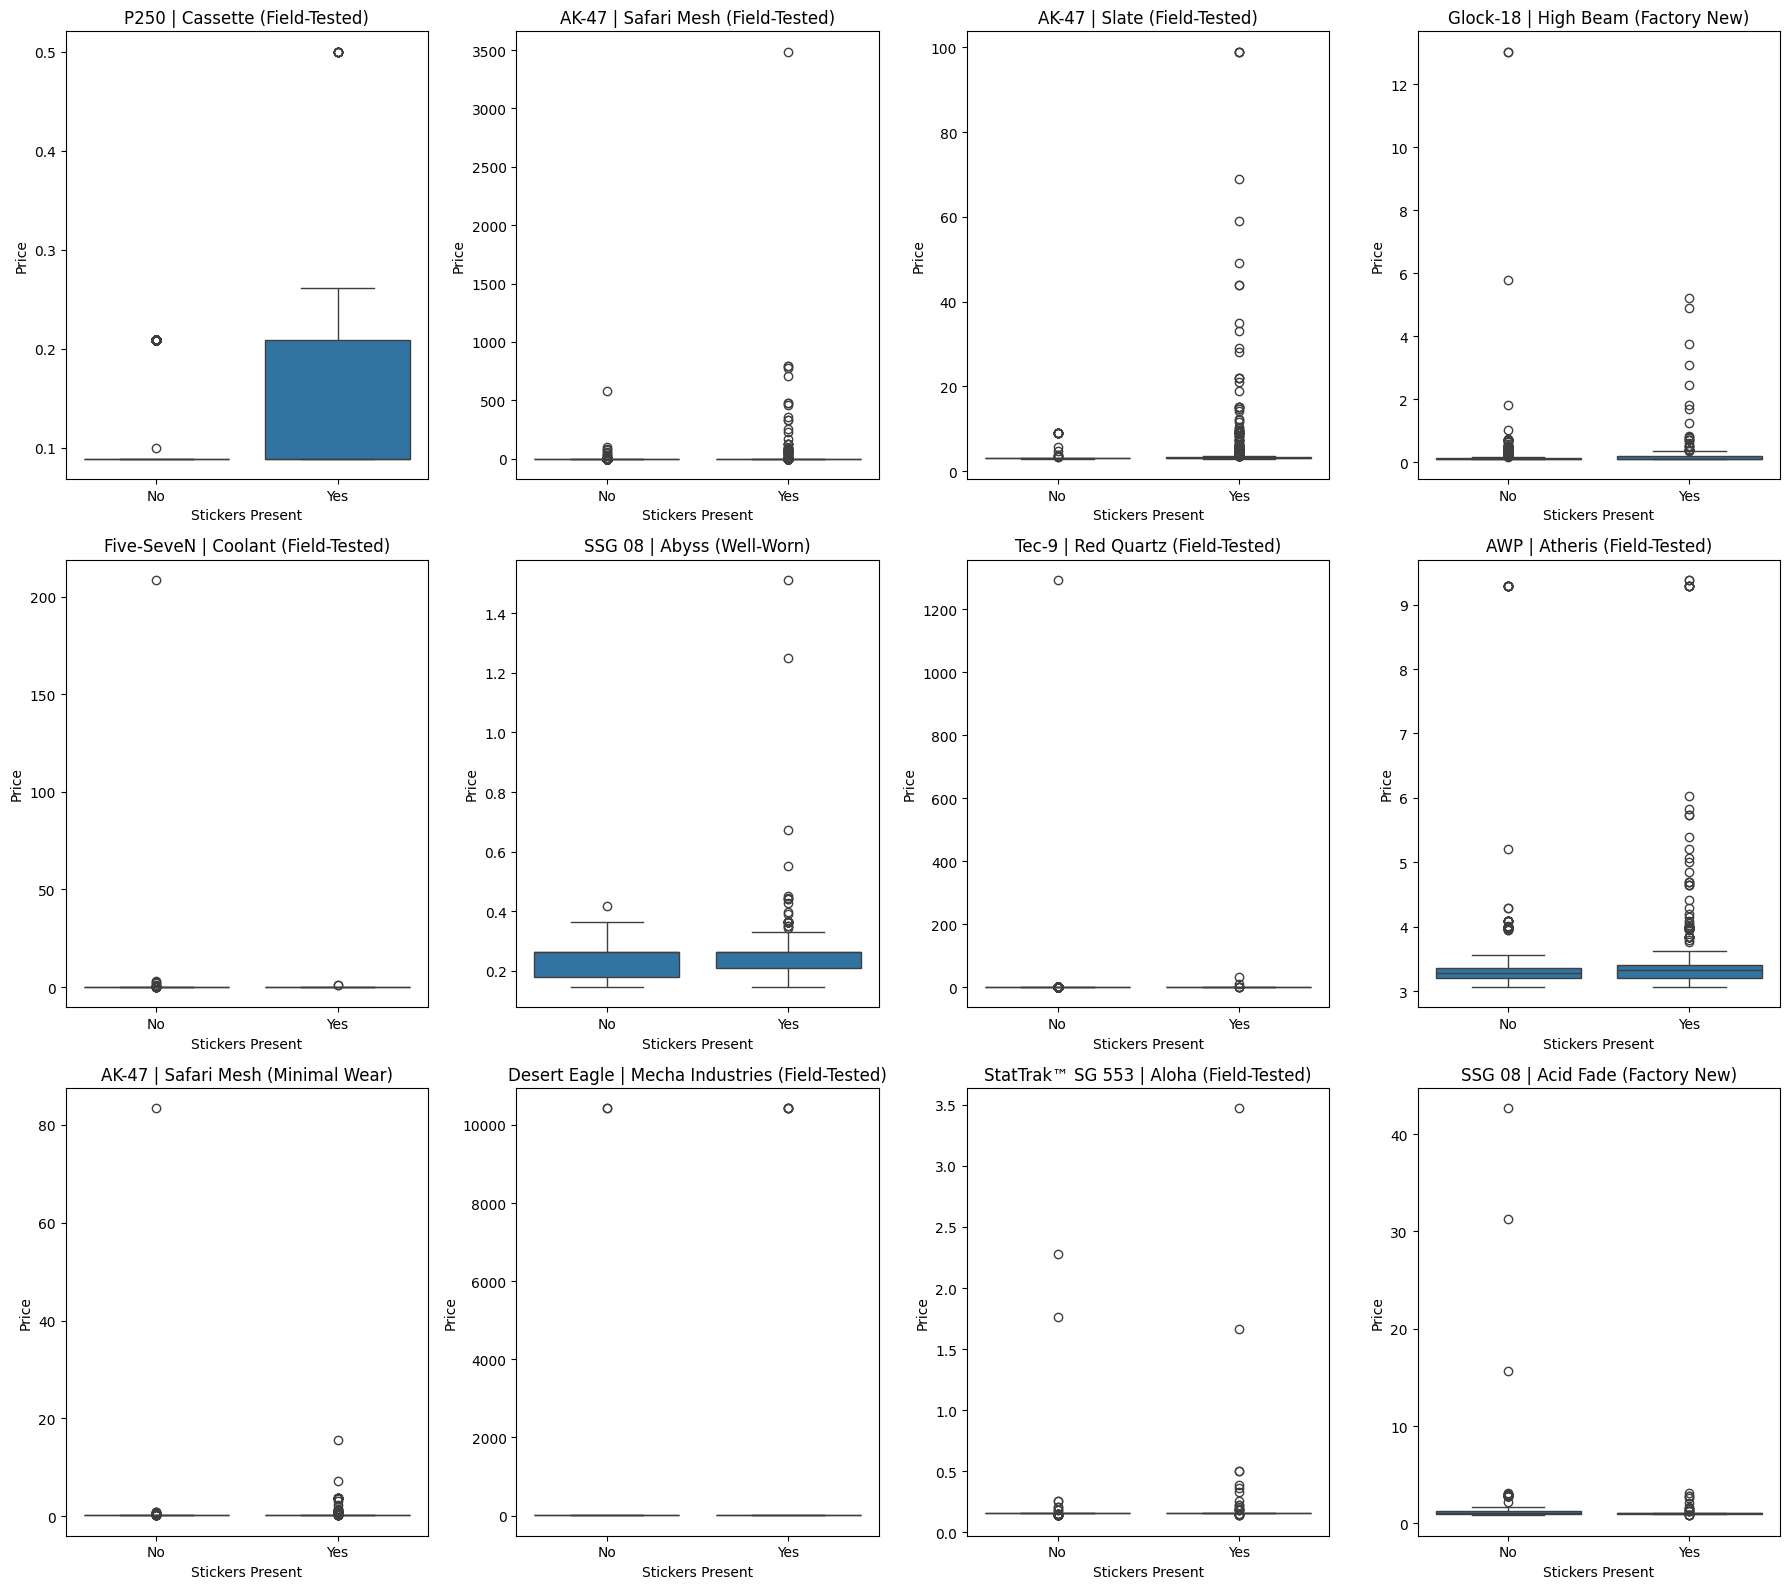

In [123]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items[df_items['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

Trying to use Robust scaler to better understand graphics

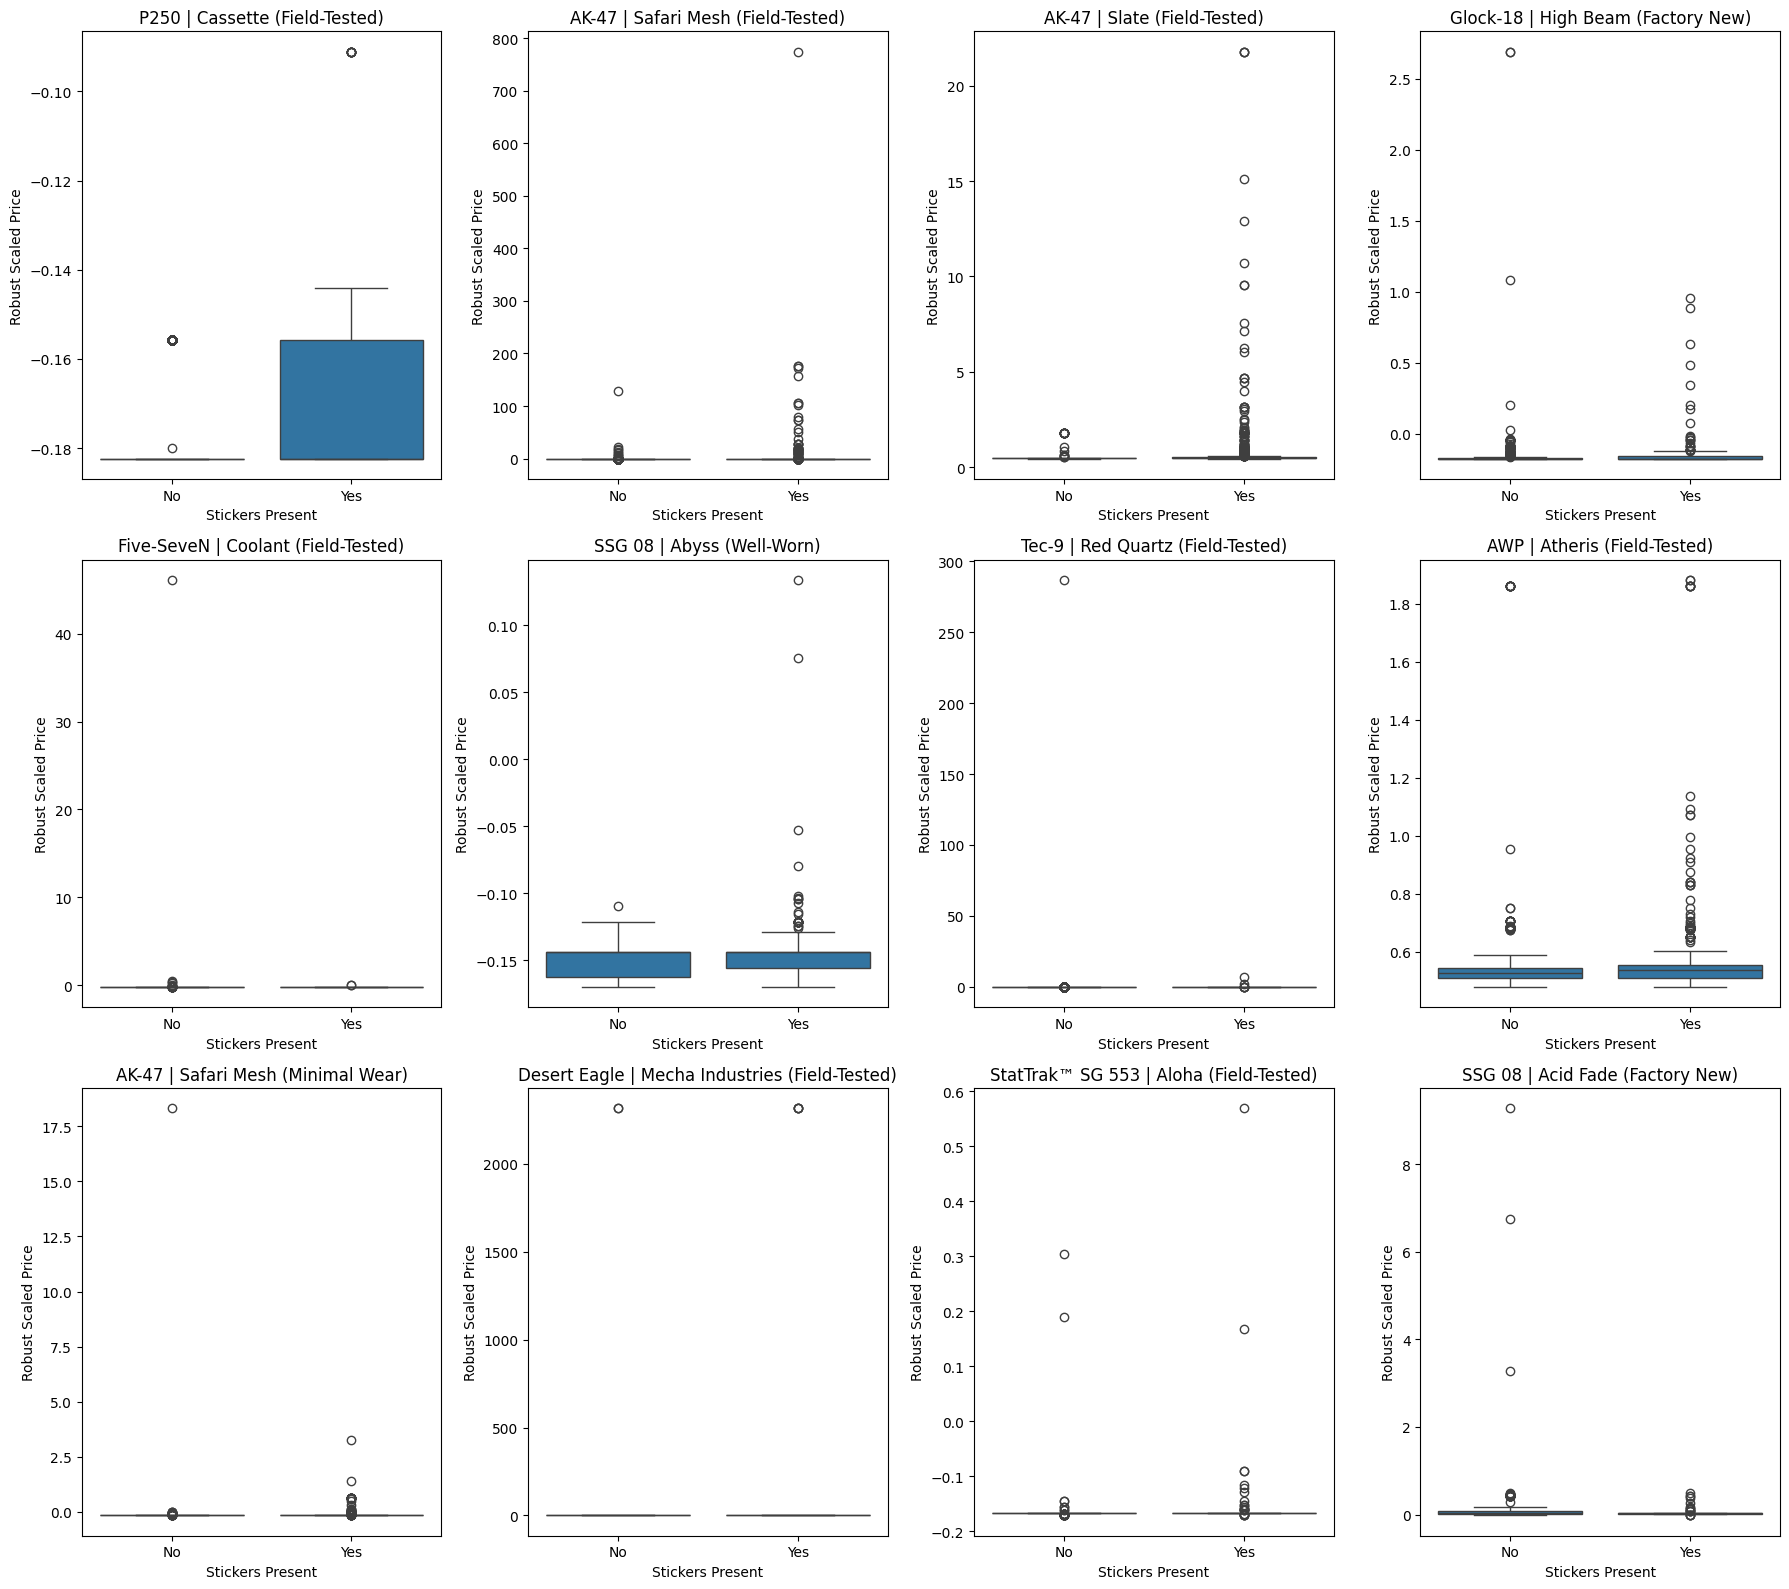

In [124]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
# Apply RobustScaler to the 'price' column and save to a different dataframe
df_items_scaled = df_items.copy()
df_items_scaled['price'] = robust_scaler.fit_transform(df_items_scaled[['price']])

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items_scaled[df_items_scaled['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Robust Scaled Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()


As we can see there are some data anomalies. Even the RobustScaler didnt help with outliers. We'll try to fix those anomalies

In [125]:

condition_no_stickers = (df_items['stickers'].isna()) & (df_items['price'] <= df_items['avg_price'] * 20)
condition_with_stickers = (df_items['stickers'].notna()) & (df_items['price'] <= df_items['avg_price'] * 100)

df_items = df_items[condition_no_stickers | condition_with_stickers]

df_items

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price
6,StatTrak™ P250 | Muertos (Minimal Wear),0.113143,NaN,1909039045|1909039045|1909039045,19.679,1013402736,NaN,NaN,Pistol,17.35
11,Nova | Windblown (Battle-Scarred),0.480939,NaN,NaN,0.511,2660532544,NaN,NaN,Shotgun,0.17
12,Galil AR | Black Sand (Battle-Scarred),0.951013,NaN,2220190233|2220190233|2220190233,0.208,2505888101,NaN,NaN,Rifle,0.17
14,MAC-10 | Allure (Field-Tested),0.308989,NaN,NaN,1.025,2690764124,NaN,NaN,SMG,0.48
21,G3SG1 | Green Apple (Factory New),0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,9.843,3475320686,NaN,NaN,Sniper Rifle,0.17
...,...,...,...,...,...,...,...,...,...,...
701583,XM1014 | Black Tie (Well-Worn),0.411214,157.0,18175348010|18194024765,0.358,5843604519,NaN,557.0,Shotgun,0.45
701586,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),0.148043,237.0,62186996,2.971,5843604567,NaN,289.0,Pistol,3.76
701588,AWP | Neo-Noir (Minimal Wear),0.121607,893.0,NaN,27.981,5843604599,NaN,803.0,Sniper Rifle,33.50
701589,M4A4 | Magnesium (Minimal Wear),0.108802,668.0,NaN,0.540,5843604623,NaN,811.0,Rifle,0.74


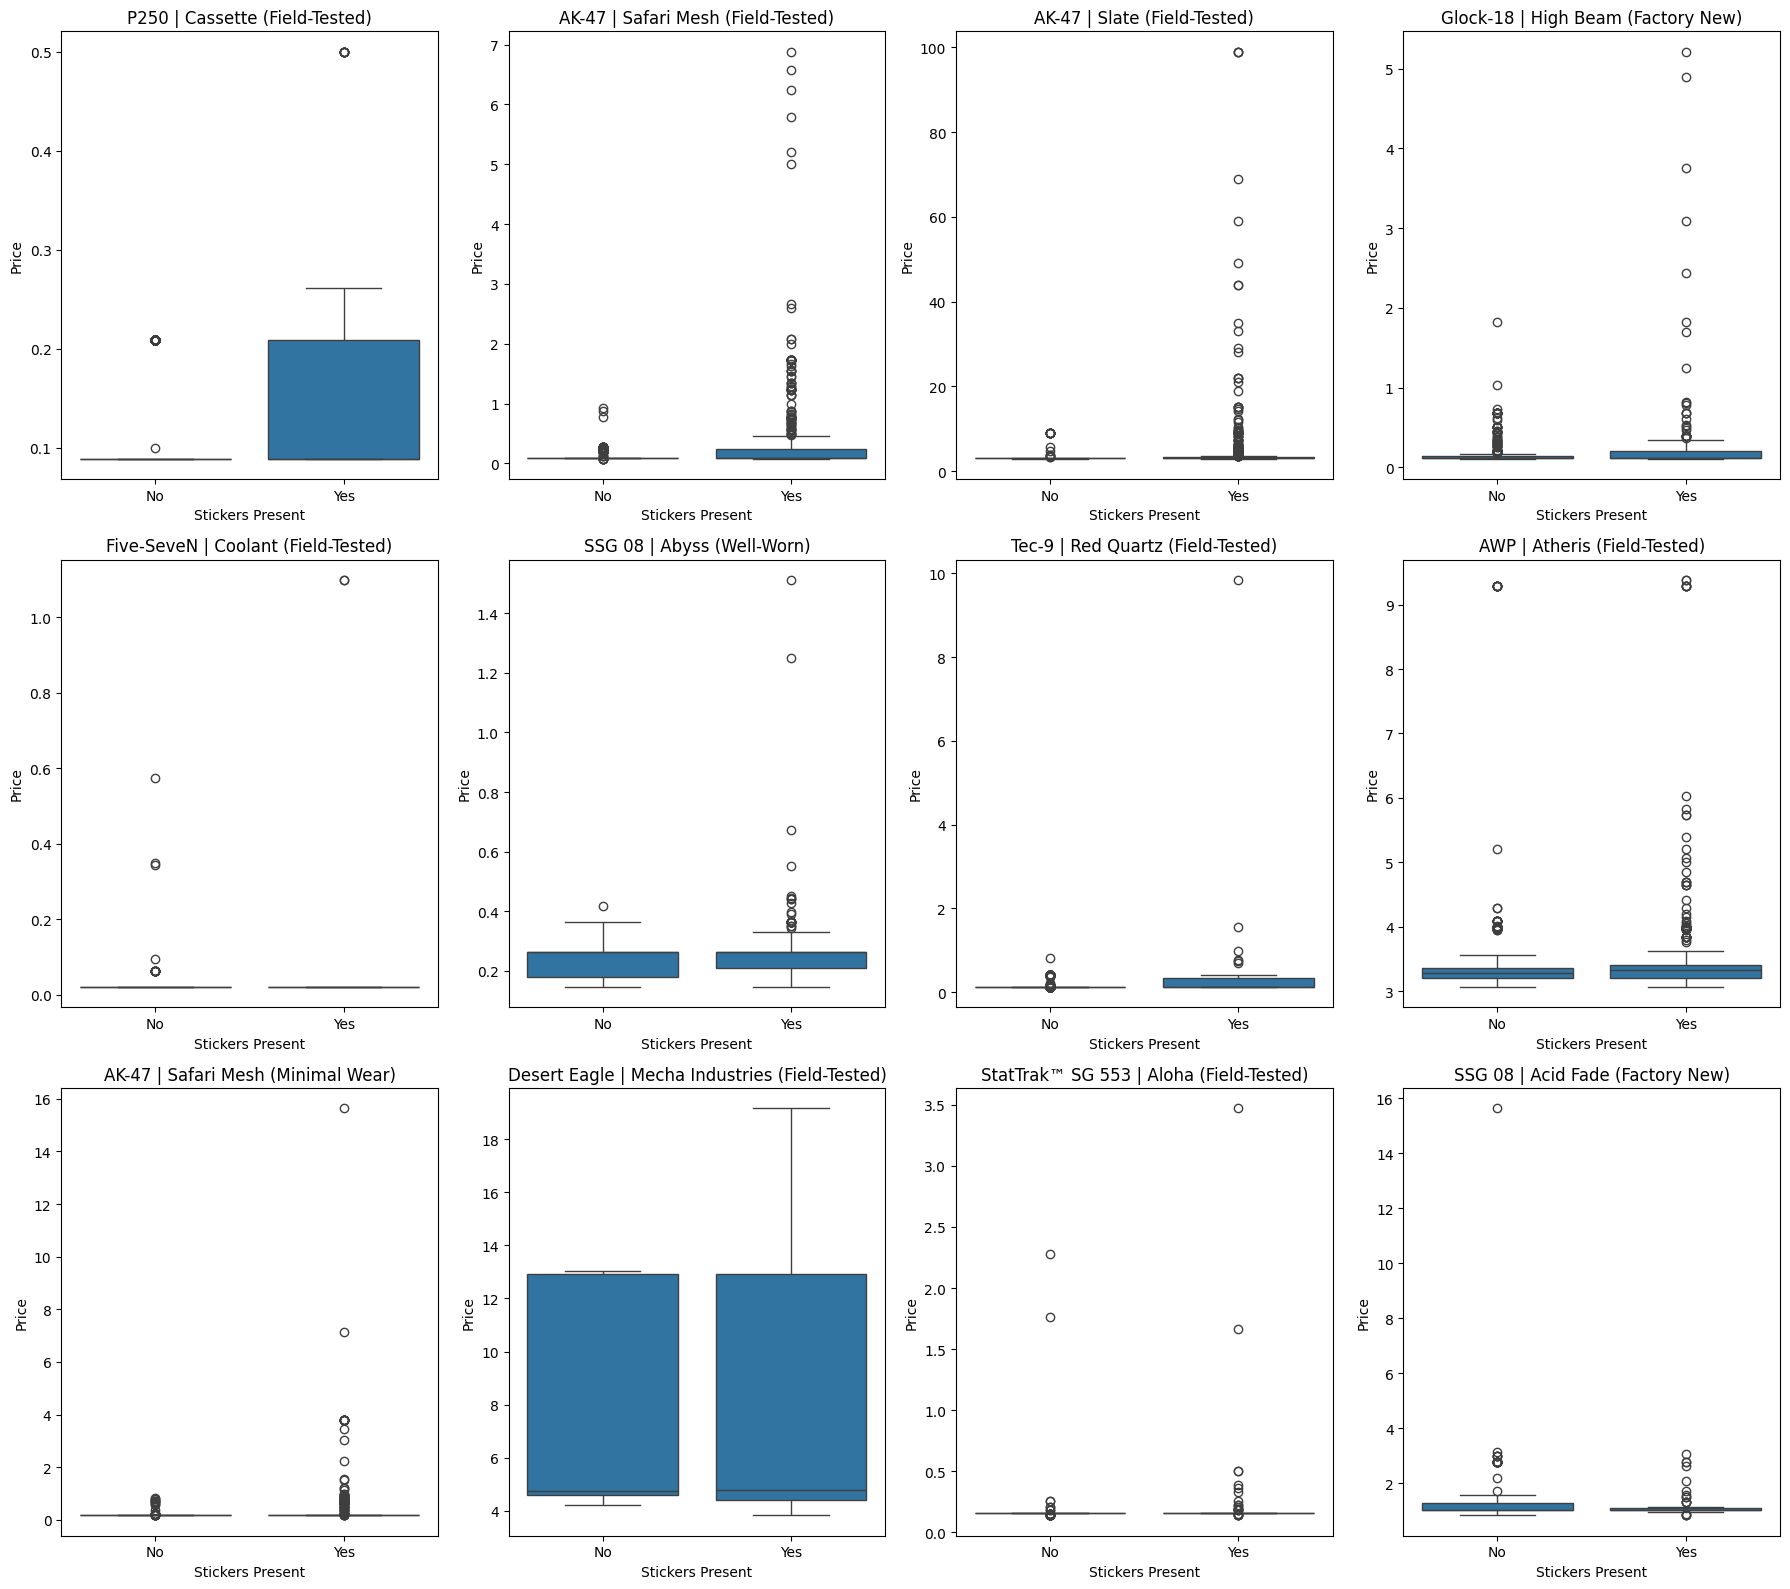

In [126]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items[df_items['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

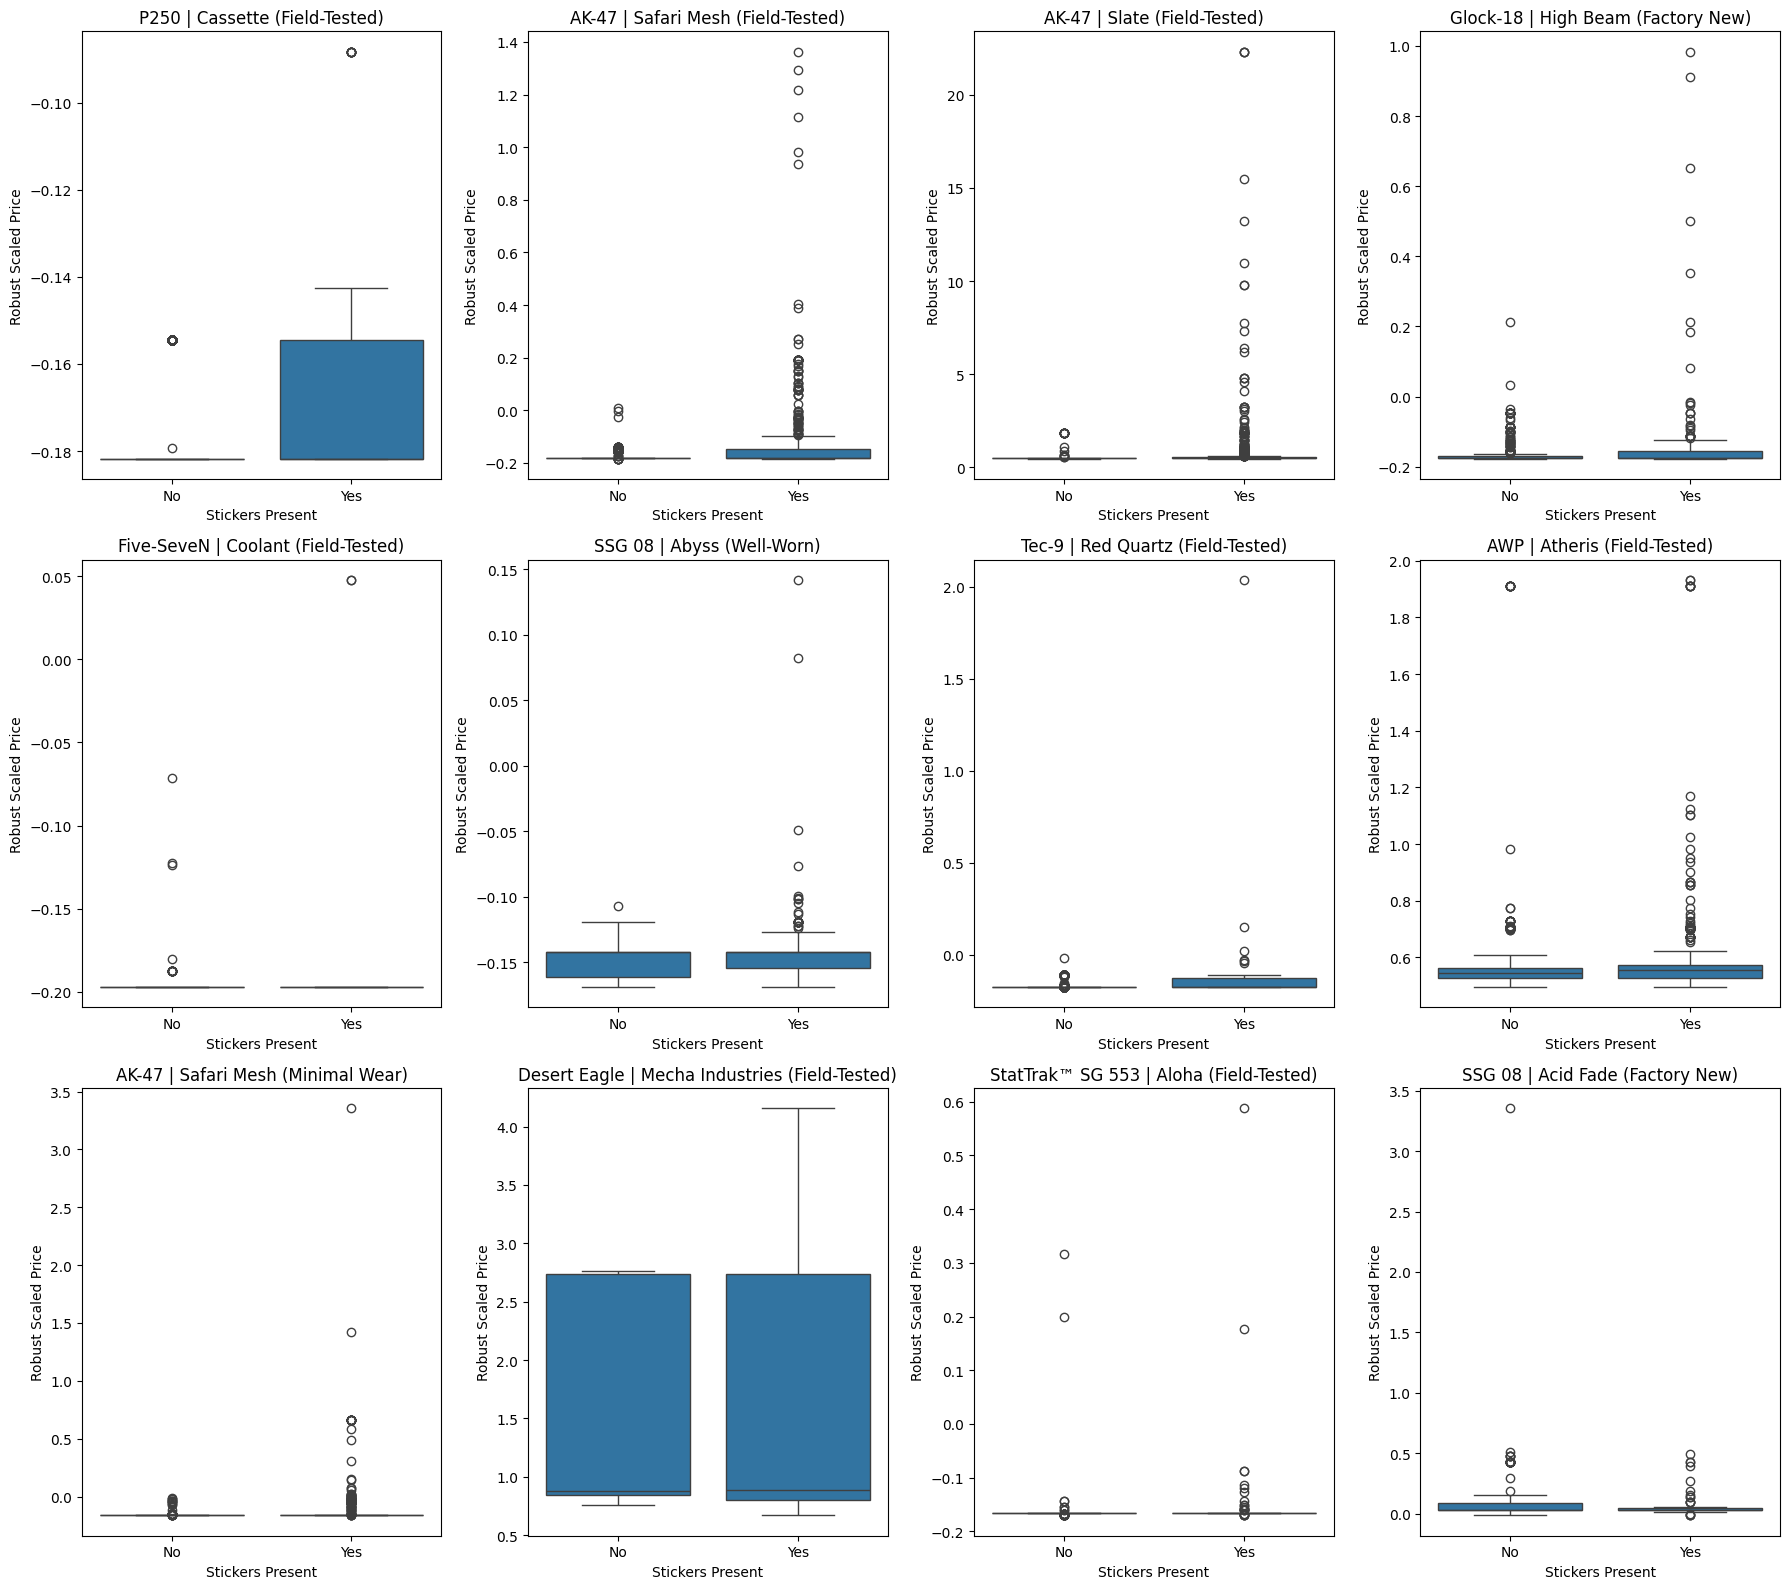

In [127]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
# Apply RobustScaler to the 'price' column and save to a different dataframe
df_items_scaled = df_items.copy()
df_items_scaled['price'] = robust_scaler.fit_transform(df_items_scaled[['price']])

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items_scaled[df_items_scaled['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Robust Scaled Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

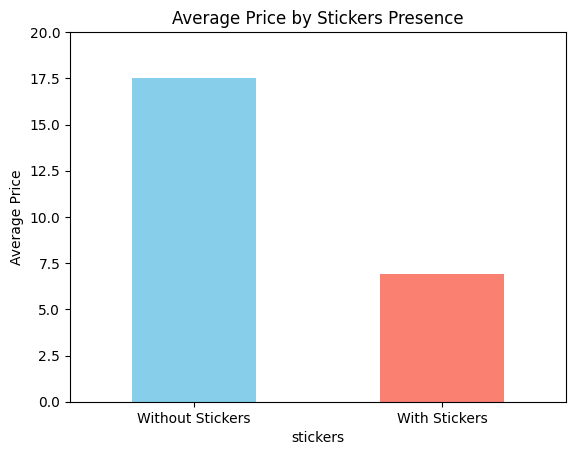

In [128]:
items_filtered_without_stickers = df_items[df_items['stickers'].isna()]['market_hash_name'].unique()
items_filtered_with_stickers = df_items[df_items['stickers'].notna()]['market_hash_name'].unique()


df_filtered = df_items[df_items['market_hash_name'].isin(items_filtered_without_stickers) & df_items['market_hash_name'].isin(items_filtered_with_stickers)]

avg_price_by_sticker = df_filtered.groupby(df_filtered['stickers'].isna())['price'].mean()

avg_price_by_sticker.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Without Stickers', 'With Stickers'], rotation=0)
plt.ylabel('Average Price')
plt.title('Average Price by Stickers Presence')
plt.ylim(0,20) 
plt.show()

In [129]:
avg_price_by_sticker_all= df_items.groupby(df_items['stickers'].isna())['avg_price'].mean()


avg_price_by_sticker_all

stickers
False    15.686862
True      6.888796
Name: avg_price, dtype: float64

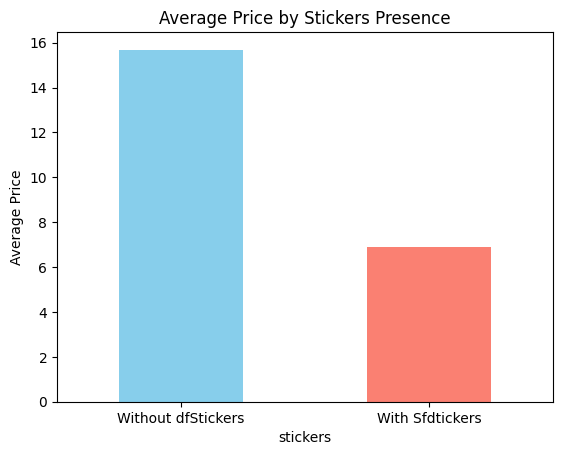

In [130]:
avg_price_by_sticker_all.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Without dfStickers', 'With Sfdtickers' ], rotation=0)
plt.ylabel('Average Price')
plt. title('Average Price by Stickers Presence')
plt.show()

In [131]:
items_with_stickers = df_items['stickers'].notna().sum()
items_without_stickers = df_items['stickers'].isna().sum()

print(f"Items with stickers: {items_with_stickers}")
print(f"Items without stickers: {items_without_stickers}")

Items with stickers: 100873
Items without stickers: 202597


In [132]:
item_to_selecet = "AK-47 | Slate (Field-Tested)"
ak47_slate = df_items[df_items['market_hash_name'] == item_to_selecet]

ak47_slate_with_stickers = ak47_slate[ak47_slate['stickers'].notna()].shape[0]
ak47_slate_without_stickers = ak47_slate[ak47_slate['stickers'].isna()].shape[0]
print(f'{item_to_selecet} with stickers: {ak47_slate_with_stickers}\n{item_to_selecet} without stickers: {ak47_slate_without_stickers}')



AK-47 | Slate (Field-Tested) with stickers: 1106
AK-47 | Slate (Field-Tested) without stickers: 197


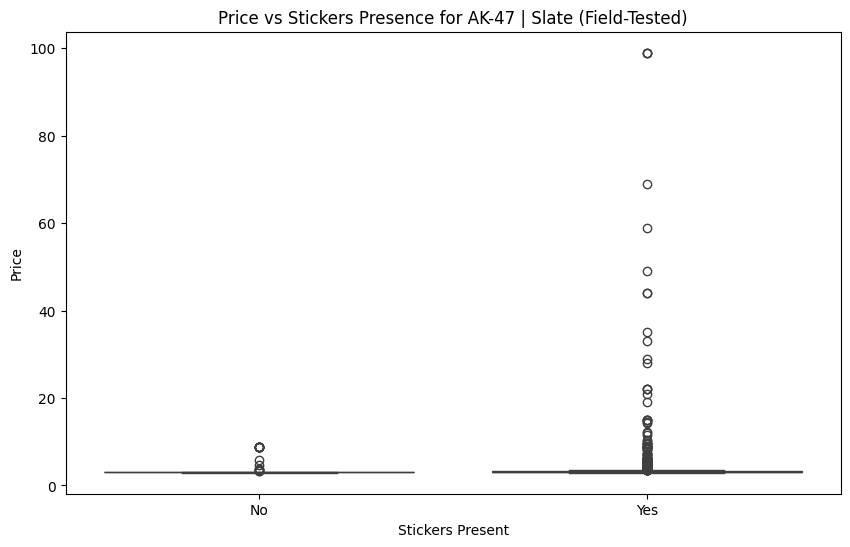

In [133]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=ak47_slate['stickers'].notna(), y='price', data=ak47_slate)
plt.title('Price vs Stickers Presence for AK-47 | Slate (Field-Tested)')
plt.xlabel('Stickers Present')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



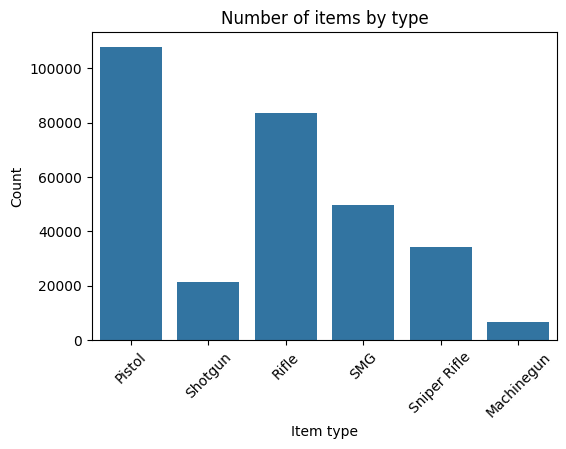

In [134]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df_items)
plt.title('Number of items by type')
plt.xlabel('Item type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [135]:
df_stiickers = pd.read_csv(PATH_TO_DATA + "sticker.csv", low_memory=False)
df_stiickers


,id,market_hash_name,avg_price
0,703631,Sticker | Vox Eminor (Holo) | Katowice 2014,1000.00
1,1028427,Sticker | mousesports (Holo) | Katowice 2014,1000.00
2,1028426,Sticker | Reason Gaming (Holo) | Katowice 2014,1000.00
3,2015210,Sticker | Clan-Mystik (Holo) | Katowice 2014,1000.00
4,2023167,Sticker | iBUYPOWER (Holo) | Katowice 2014,69000.00
...,...,...,...
3051,31924683293,Sticker | Red Shades (Foil),2.60
3052,31932194446,Sticker | Fly High,0.12
3053,32006078374,Sticker | From The Deep (Glitter),0.26
3054,18349422080,Sticker | Grim (Glitter) | Paris 2023,0.03


In [136]:
def get_avg_sticker_price(sticker_ids, df_stickers):
	if pd.isna(sticker_ids):
		return 0
	ids = sticker_ids.split('|')
	prices = df_stickers[df_stickers['id'].isin(map(int, ids))]['avg_price']
	return prices.sum() if not prices.empty else 0

df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)
df_items.head()

C:\Users\user\AppData\Local\Temp\ipykernel_7644\665571864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)


,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price,sum_sticker_price
6,StatTrak™ P250 | Muertos (Minimal Wear),0.113143,NaN,1909039045|1909039045|1909039045,19.679,1013402736,NaN,NaN,Pistol,17.35,0.00
11,Nova | Windblown (Battle-Scarred),0.480939,NaN,NaN,0.511,2660532544,NaN,NaN,Shotgun,0.17,0.00
12,Galil AR | Black Sand (Battle-Scarred),0.951013,NaN,2220190233|2220190233|2220190233,0.208,2505888101,NaN,NaN,Rifle,0.17,0.00
14,MAC-10 | Allure (Field-Tested),0.308989,NaN,NaN,1.025,2690764124,NaN,NaN,SMG,0.48,0.00
21,G3SG1 | Green Apple (Factory New),0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,9.843,3475320686,NaN,NaN,Sniper Rifle,0.17,5.67


In [137]:
df_items_sorted = df_items.sort_values(by='sum_sticker_price', ascending=False)
df_drop_empty_avg_sticker_price = df_items_sorted[df_items_sorted['sum_sticker_price'] != 0]
df_drop_empty_avg_sticker_price.head(30)

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price,sum_sticker_price
143289,StatTrak™ USP-S | Serum (Minimal Wear),0.112255,330.0,2023167|1425334777,2376.463,5549178052,NaN,221.0,Pistol,48.53,70330.22
59752,AK-47 | Case Hardened (Field-Tested),0.351743,487.0,1382152,2055.000,5298091727,NaN,44.0,Rifle,306.91,69000.00
143288,Desert Eagle | Cobalt Disruption (Factory New),0.034576,150.0,1382152,1844.886,5549177961,NaN,231.0,Pistol,102.46,69000.00
15872,M4A1-S | Bright Water (Minimal Wear),0.116098,366.0,554817|4298818|1230564|601566,1097.167,4200193930,NaN,189.0,Rifle,33.72,4783.33
59753,AK-47 | Blue Laminate (Minimal Wear),0.085615,40.0,1230564|554817|450475|556556,835.000,5298091776,NaN,226.0,Rifle,14.65,4753.04
139091,StatTrak™ USP-S | Orion (Minimal Wear),0.145007,344.0,39250|2674697|620912|1412941,2084.617,5521036799,NaN,313.0,Pistol,107.84,4340.07
44861,P250 | Splash (Minimal Wear),0.109596,775.0,1230564|1326569|556556,300.000,5274718440,NaN,162.0,Pistol,23.29,3933.53
556570,AWP | Graphite (Factory New),0.010839,632.0,554817|245|1028428|610132,650.000,5837226374,NaN,212.0,Sniper Rifle,182.16,3733.39
143287,M4A1-S | Guardian (Battle-Scarred),0.480070,414.0,556556|554817|4298818|450475,865.116,5549172536,NaN,257.0,Rifle,21.76,3553.04
44697,AK-47 | Redline (Field-Tested),0.290799,421.0,554817|116105|450475|1780232,1200.000,5274559323,NaN,282.0,Rifle,34.22,3020.07


In [138]:
df_items['overpay'] = df_items['price'] / df_items['avg_price']


C:\Users\user\AppData\Local\Temp\ipykernel_7644\591393253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['overpay'] = df_items['price'] / df_items['avg_price']


In [139]:
columns_to_remove = ['paintseed', 'paintindex', 'phase', 'type']  # Replace with your actual column names
df_items.drop(columns=columns_to_remove, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_7644\890815815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items.drop(columns=columns_to_remove, inplace=True)


In [146]:

df_items_sorted_by_sticker_price = df_items.sort_values(by='sum_sticker_price', ascending=False)
df_drop_empty_avg_sticker_price = df_items_sorted_by_sticker_price[
    (df_items_sorted_by_sticker_price['overpay'] < 10) & 
    (df_items_sorted_by_sticker_price['price'] < 20) &
    (~df_items_sorted_by_sticker_price['market_hash_name'].str.contains('Souvenir')) &
    (df_items_sorted_by_sticker_price['sum_sticker_price'] > 100)

    ]
df_drop_empty_avg_sticker_price.head(30)

,market_hash_name,float,stickers,price,id,avg_price,sum_sticker_price,overpay
473622,M4A4 | Desert-Strike (Field-Tested),0.161184,9087691779|682803|346461|191197,13.000,5826660910,4.61,123.11,2.819957
72676,StatTrak™ G3SG1 | Demeter (Minimal Wear),0.123288,11435101029|11435101029|11435101029|1143510102...,11.271,5342370878,9.45,108.21,1.192698
223656,StatTrak™ P250 | Supernova (Minimal Wear),0.086153,116105|389663,10.830,5706933690,3.21,103.95,3.373832
699213,AK-47 | Frontside Misty (Battle-Scarred),0.722060,54315|334179|79789,14.582,5843580087,11.30,102.78,1.290442
211653,FAMAS | Roll Cage (Field-Tested),0.179890,1327608116|1359779979|1422598416|1425999594,13.000,5694287826,2.54,100.43,5.118110
